In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from Layer import Dense
from Activation import ReLU
from Loss import CategoricalCrossEntropy
from Optimizer import SGD, Adagrad, RMSprop, Adam

In [5]:
from nnfs.datasets import spiral_data

In [7]:
def calculate_accuracy(y_pred, y_true):
    y_pred = np.argmax(y_pred, axis=1)
    if(len(y_true.shape) == 2):
        y_true = np.argmax(y_true, axis=1)
    accuracy = np.mean(y_true == y_pred)
    return accuracy

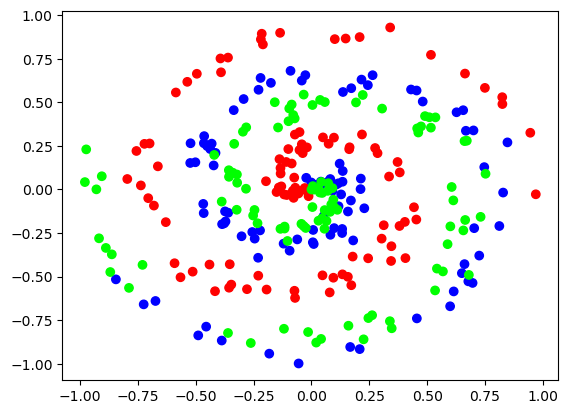

In [9]:
X, y = spiral_data(classes=3, samples=100)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

## Vanilla SGD

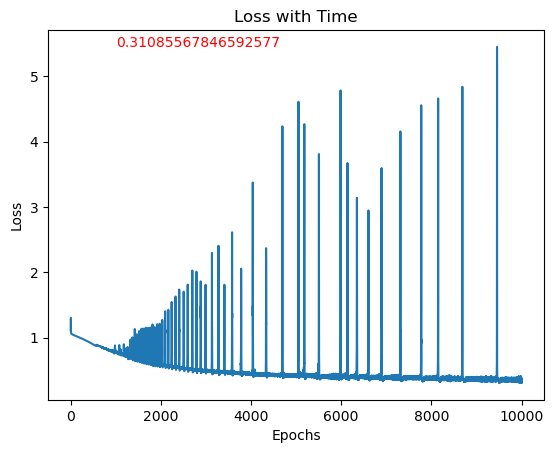

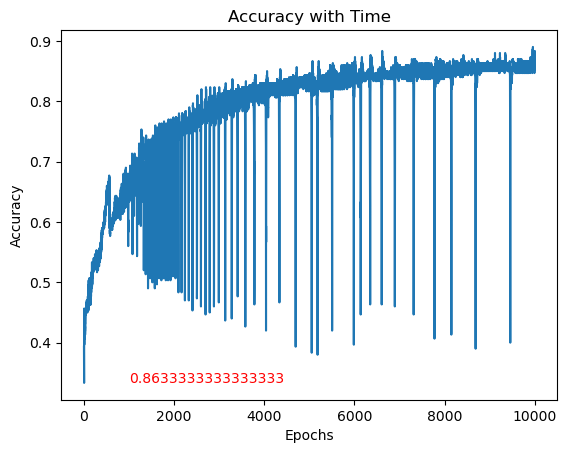

In [8]:
X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = SGD(lr=learning_rate)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## SGD with learning rate decay

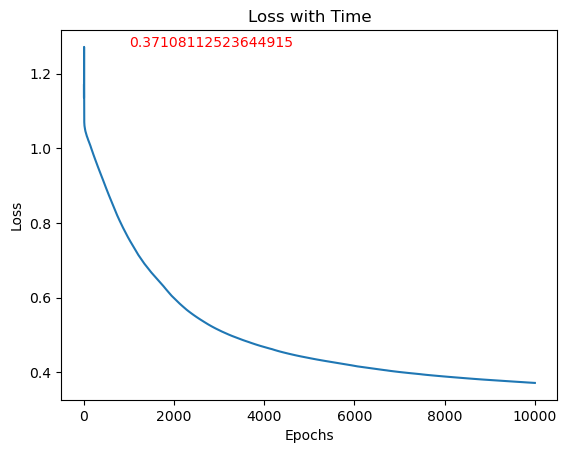

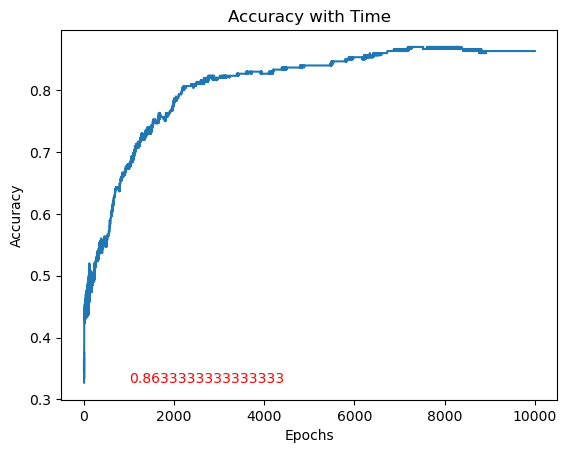

In [26]:
X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = SGD(lr=learning_rate, decay=0.001)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## SGD with Momentum

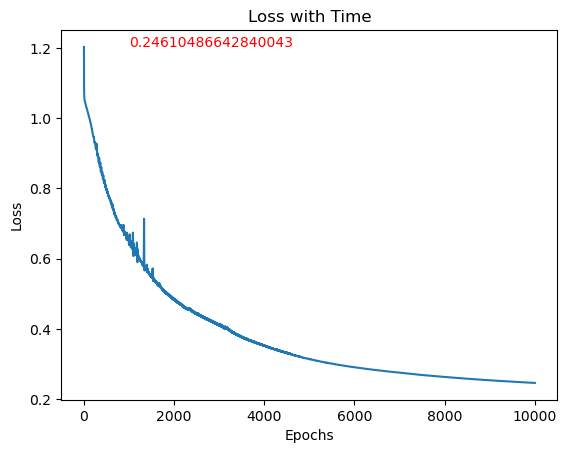

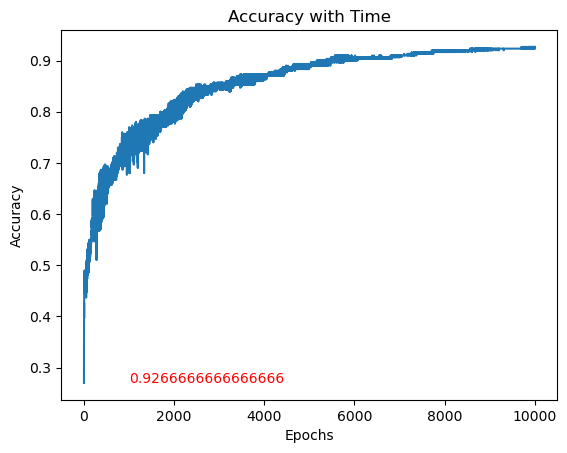

In [16]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = SGD(lr=learning_rate, decay=0.001, momentum=0.5)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Adagrad - adaptive gradient

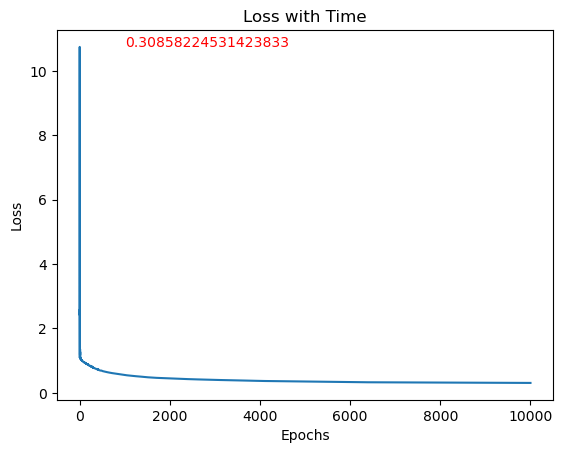

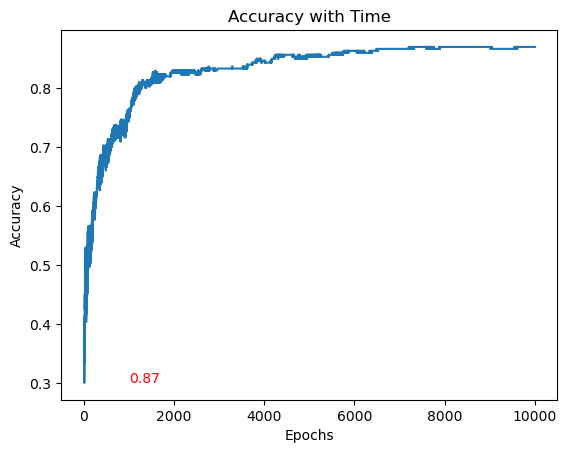

In [28]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = Adagrad(lr=learning_rate, decay=0.001)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## RMSprop

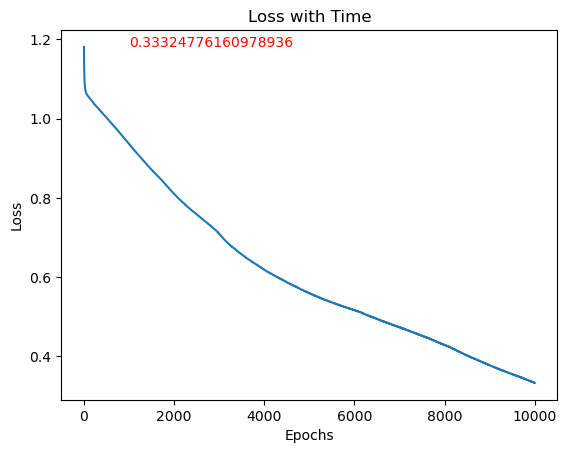

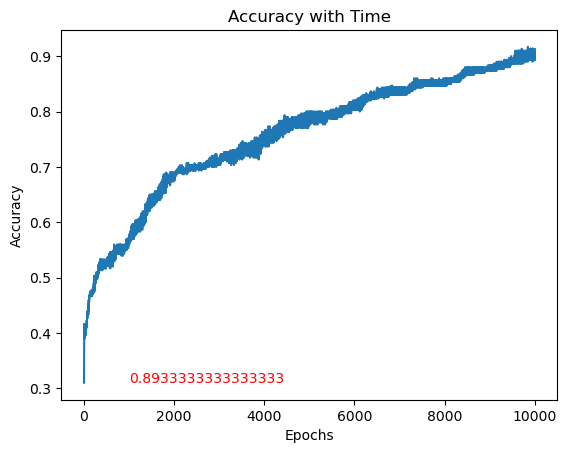

In [41]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = RMSprop(lr=learning_rate, decay=0., rho=0.9)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Adam - Adagrad + Momentum

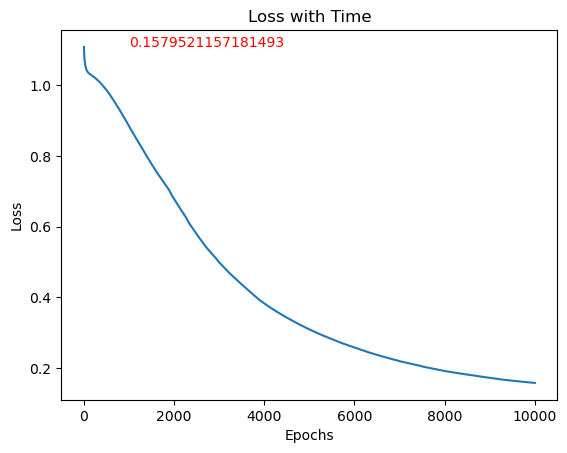

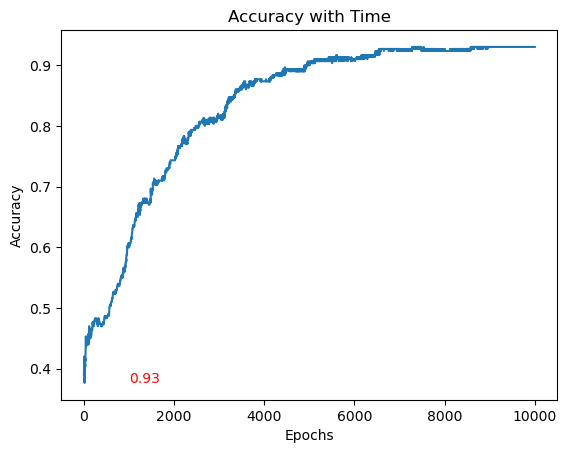

In [9]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = Adam(lr=learning_rate)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()